# Doing things the Pandas Way!!!

## Problem at hand.

Consider a set of courses running in a department of an Institute.
The courses require a certain number of teaching assistants(TAs) for each of them.
The Students are asked for their preferences as to which course they would like to be a TA for. How to allot courses to the students optimally?

### Scenario

Each course is asked for their TA requirements and each student on the other hand is asked to give 3 choices from the available courses which will be offered in the coming semester.

Constraints:
- Each student can be allotted to only one course
- A course can only be alloted a fixed number of TAs.

### Data available

We have available 2 files:
- One which contains a list of students along with their choices for the course they would like to TA for.
- The second file has a list of courses and the number of TAs requires for each of the courses.

### Lets Play!
Lets read in the data available.

Pandas make it very easy to read in CSV files into objects called 'DataFrames'.

In [65]:
# Import Pandas
import pandas as pd
# Reading in the students data.
studentsDF = pd.read_csv('taPrefs.csv')

THATS IT! 

Remember the function we wrote while dealing with lists. Duh!

#### Viewing the data

In [66]:
# Taking a peek at the data
studentsDF.head()

,RollNo,Name,Choice1,Choice2,Choice3,Specialization
0,134070022,Harsha,EE660,EE234,EE713,EE3
1,134070023,Manoj,EE705,EE619,EE224,EE5
2,134070024,Prashant,EE724,EE727,EE760,EE4
3,134070025,Aniket,EE112,EE112,EE112,EE1
4,134070026,Prasanna,EE706,EE739,EE702,EE1


#### Operating on the data

Now we have the data as DataFrames, which can be easily indexed to retrieve data.

In [67]:
# Lets slice out the 3rd students data
studentsDF.loc[3]

RollNo            134070025
Name                 Aniket
Choice1               EE112
Choice2               EE112
Choice3               EE112
Specialization          EE1
Name: 3, dtype: object

In [68]:
# Counting the number of entries in the DataFrame.
studentCount = len(studentsDF.index)
studentCount

279

In [69]:
# Extracting the Specialization of each of the students
specializationArray = studentsDF['Specialization']
specializationArray.tail()

274    EE5
275    EE4
276    EE3
277    EE3
278    EE5
Name: Specialization, dtype: object

In [70]:
# Another way to do the above
studentsDF.Specialization.tail()

274    EE5
275    EE4
276    EE3
277    EE3
278    EE5
Name: Specialization, dtype: object

NOTE : No need to rememeber what was the index of the column containing the 'Specialization' information unlike lists/arrays.

In [71]:
# Importing a few libraries for plotting
%matplotlib inline
import numpy as np

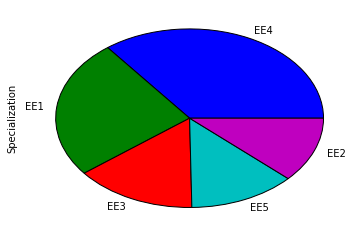

In [72]:
# Sepcialization based grouping of TAs.
studentsDF.Specialization.value_counts().plot(kind='pie')

In [73]:
# Quick stats on the Choice1 column of the data
studentsDF.Choice1.describe()

count       279
unique       50
top       EE224
freq         21
Name: Choice1, dtype: object

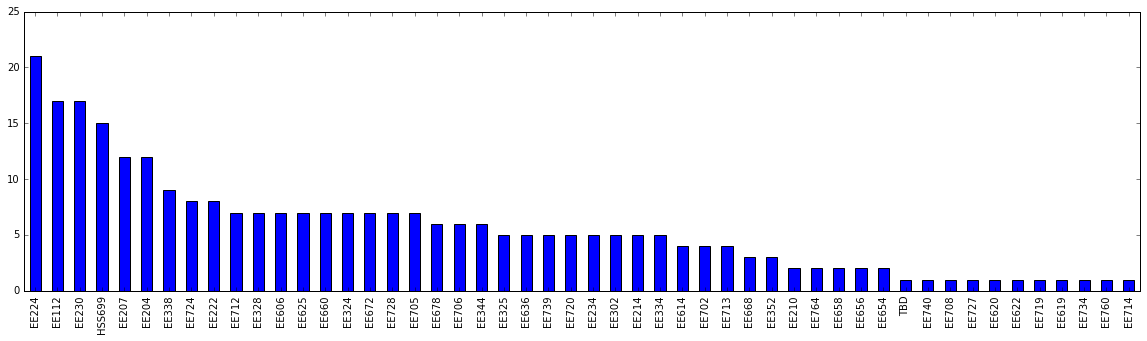

In [74]:
# Bar chart of choice1, gives popularity of a course in a way.
studentsDF.Choice1.value_counts().plot(figsize=(20,5), kind='bar')

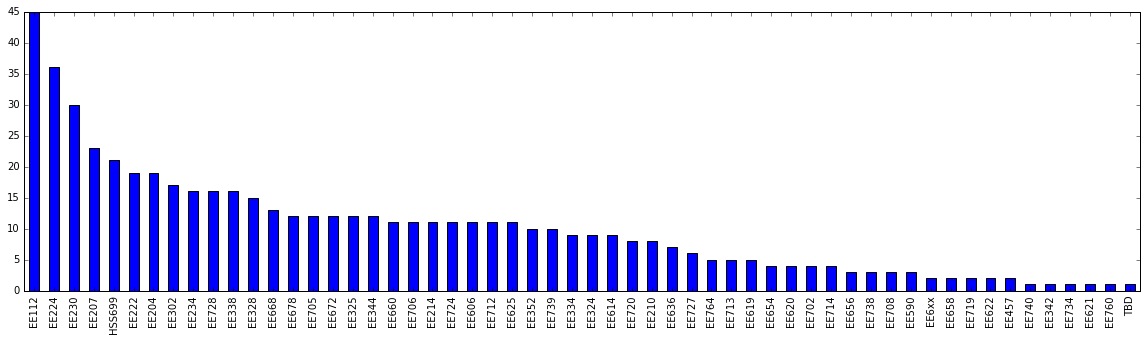

In [99]:
# Combining Choice1 and choice 2 columns
(pd.concat([studentsDF['Choice1'], studentsDF["Choice2"]], axis=0)).value_counts().plot(figsize=(20,5), kind='bar')

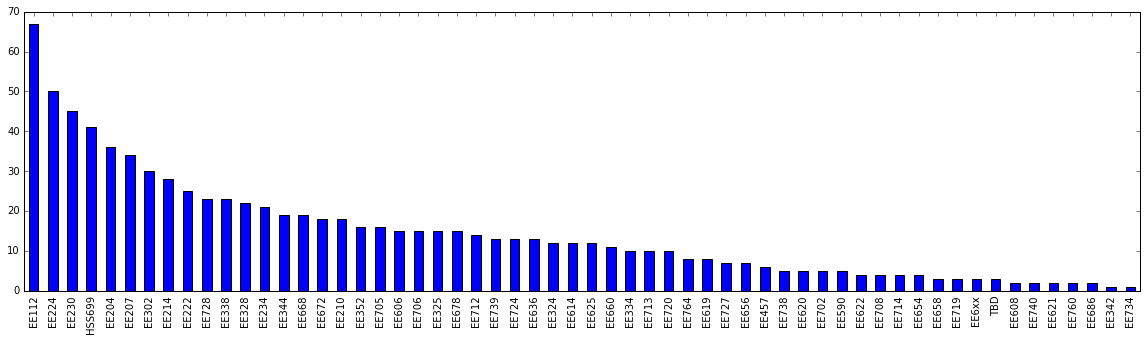

In [100]:
# Combining Choice1 and choice 2 columns
(pd.concat([studentsDF['Choice1'], studentsDF["Choice2"], studentsDF["Choice3"]], axis=0)).value_counts().plot(figsize=(20,5), kind='bar')

In [77]:
# Making specialization wise dataframes.
ee1StudentDF = studentsDF[studentsDF['Specialization'] == "EE1"]

In [78]:
# Viewing the new EE1 dataframe
ee1StudentDF.head()

,RollNo,Name,Choice1,Choice2,Choice3,Specialization
3,134070025,Aniket,EE112,EE112,EE112,EE1
4,134070026,Prasanna,EE706,EE739,EE702,EE1
5,134070027,Bijja,EE706,EE328,HSS699,EE1
7,134070029,Ullash,EE614,EE230,EE204,EE1
8,134070030,Anup,EE678,EE210,EE338,EE1


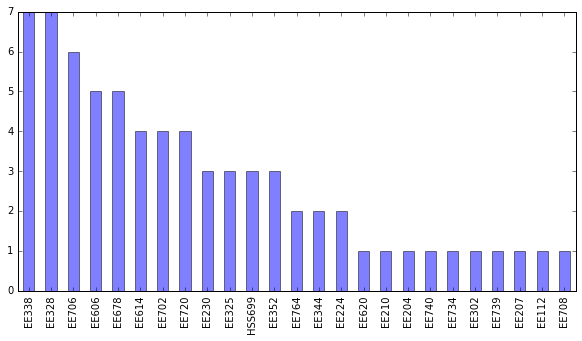

In [79]:
# Plotting the course popularity for choice1 among EE1 students.
ee1StudentDF.Choice1.value_counts().plot(figsize=(10,5), kind='bar', alpha=0.5)

In [80]:
# Getting a data frame of just the EE1 students.
ee1StudentDF.groupby('Choice1').count()

,RollNo,Name,Choice2,Choice3,Specialization
Choice1,,,,,
EE112,1,1,1,1,1
EE204,1,1,1,1,1
EE207,1,1,1,1,1
EE210,1,1,1,1,1
EE224,2,2,2,2,2
EE230,3,3,3,3,3
EE302,1,1,1,1,1
EE325,3,3,3,3,3
EE328,7,7,7,7,7


In [81]:
# Saving a file.
ee1StudentDF.to_csv('ee1StudentPrefsLast.csv')

NOTE : One single command, thats it!!!

In [82]:
# Students who provided all the 3 choices as a 3rd year Course. (3xx course is a 3rd year UG course).
ee1StudentDF[ee1StudentDF.Choice1.str.startswith('EE3') & ee1StudentDF.Choice2.str.startswith('EE3') & ee1StudentDF.Choice3.str.startswith('EE3')]

,RollNo,Name,Choice1,Choice2,Choice3,Specialization
128,134070150,Shreyans,EE328,EE328,EE328,EE1
161,134070183,Lavesh,EE352,EE352,EE344,EE1
162,134070184,Ankur,EE352,EE352,EE344,EE1
188,134070210,Varun,EE325,EE328,EE352,EE1
200,134070222,Soham,EE328,EE302,EE352,EE1


In [83]:
# Getting the number of students preferring a 3rd year course as 1st Choice.
(ee1StudentDF.Choice1.str.startswith('EE3')).sum()

23

In [84]:
# Getting the number of students preferring a PG course as 1st Choice.
(ee1StudentDF.Choice1.str.startswith('EE6')).sum()

15

## Conclusion :
* Huge datasets can be handled very easily and efficiently.
* Pandas gives us a very simple and intuitive interface to deal with data.
* Pandas is optimized for this and is hence much faster than using lists or other default python language constructs.

# THANK YOU!